<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝

    - 차원축소 / 군집

        PCA / LDA / SVD

        KMeans

        군집평가, DBSCAN

    - 텍스트 처리

        NLP, BOW

        텍스트 분류

        감성분석

        문서유사도

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image

In [ ]:
ls ./drive/MyDrive/data/image*

./drive/MyDrive/data/image_SVD_data.jpeg


In [ ]:
img = Image.open('./drive/MyDrive/data/image_SVD_data.jpeg')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

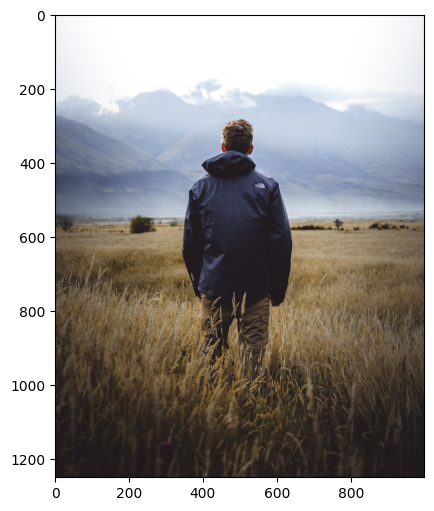

In [ ]:
plt.figure(figsize=(9, 6))
plt.imshow(img)

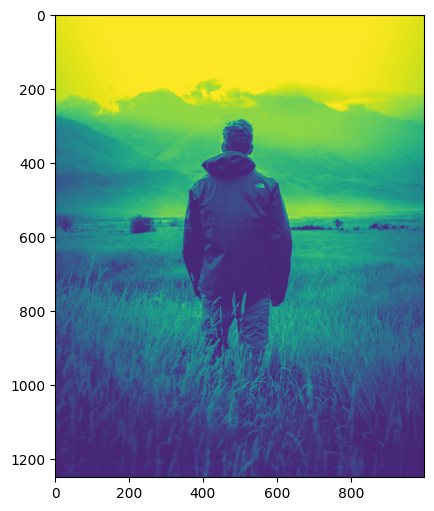

In [ ]:
imggray = img.convert('L')
plt.figure(figsize=(9, 6))
plt.imshow(imggray)

In [ ]:
type(imggray)

PIL.Image.Image

In [ ]:
imgmat_ = np.array(imggray)

In [ ]:
imgmat_.shape

(1250, 1000)

In [ ]:
U, sigma, V = np.linalg.svd(imgmat_)

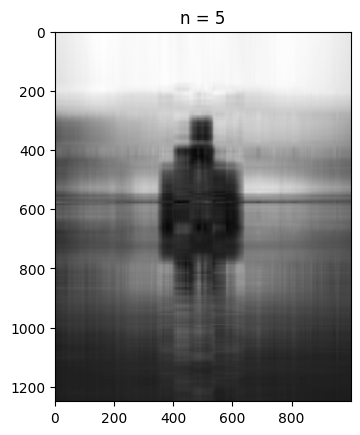

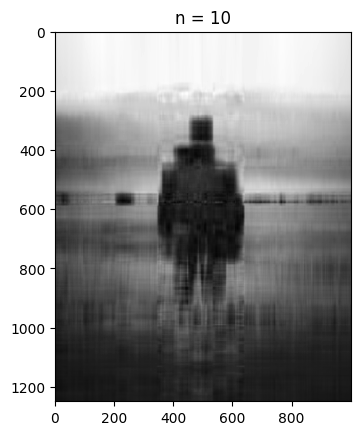

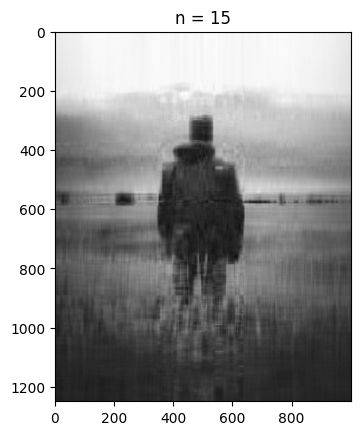

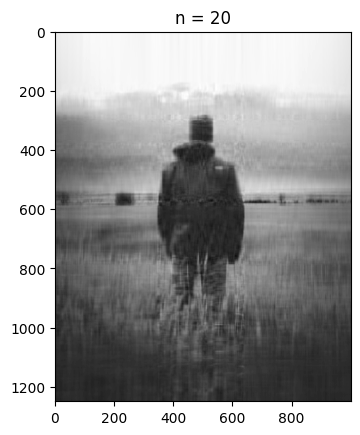

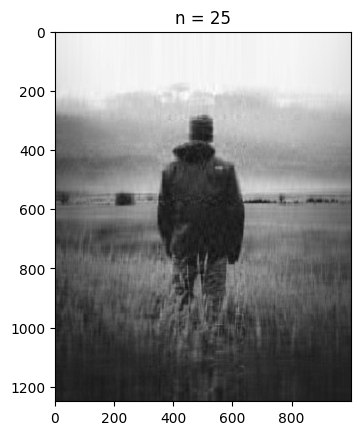

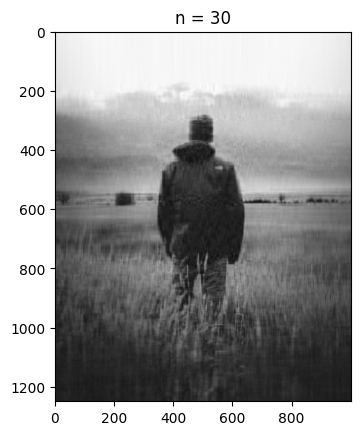

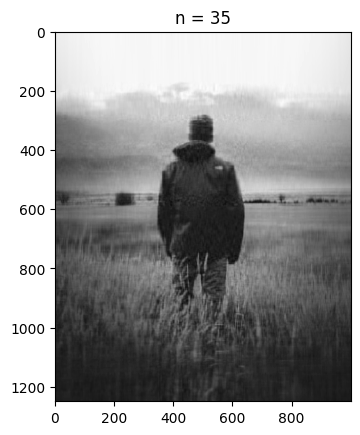

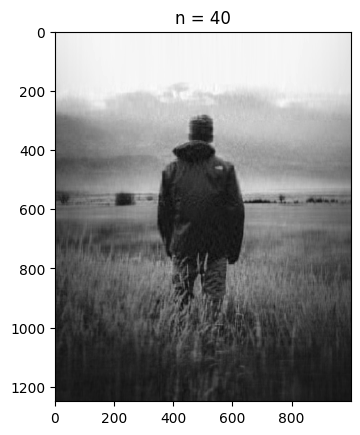

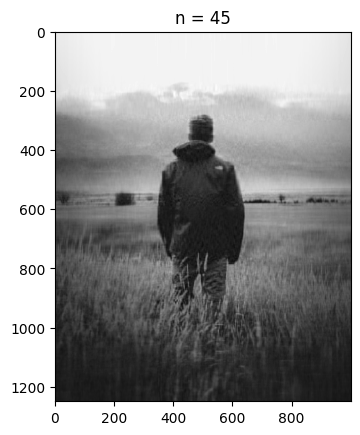

In [ ]:
for i in range(5, 50, 5):
    reconstimg = np.matrix(U[:, :i])*np.diag(sigma[:i])*np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    plt.title(f'n = {i}')
    plt.show()

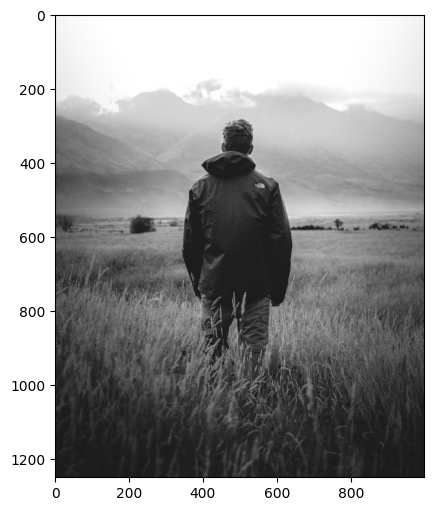

In [ ]:
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray)

In [ ]:
imgmat = np.array(imggray)
imgmat.shape

(1250, 1000, 2)

In [ ]:
imgmat[:, :, 0].shape

(1250, 1000)

#군집분석

# k-means

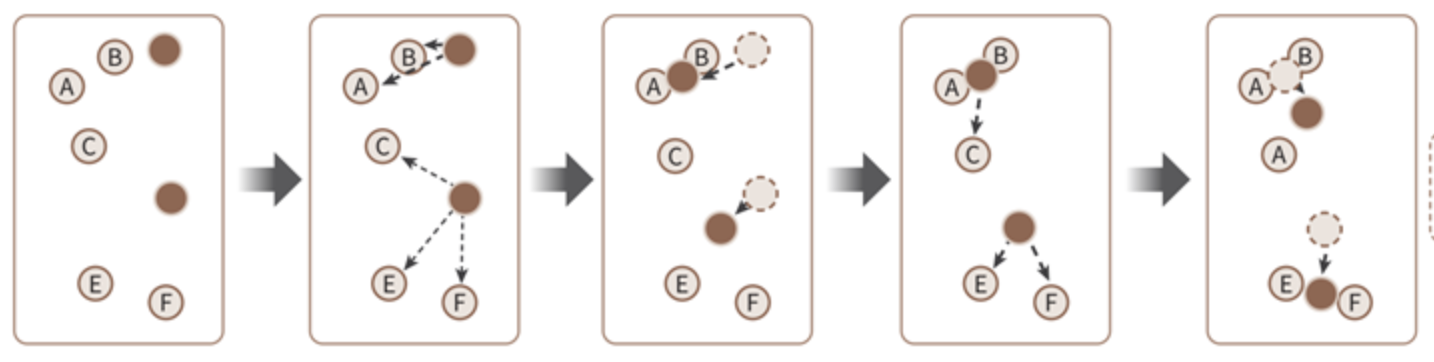

### sklearn.cluster.KMeans

- n_cluster : 군집화 개수

- init : 처음 군집 중심점의 좌표를 설정하는 방식, 일반적으로 k-means++ 사용

- max_iter : 최대 반복 횟수 (위의 과정 중 2 ~ 5번)

- labels_ : 군집 중심점의 레이블 (결과정보)

- cluster_centers_ : 군집 중심점의 좌표

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
iris = load_iris()

In [ ]:
irisDF=pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)

In [ ]:
kmeans.fit(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_

In [ ]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [ ]:
irisDF.groupby(['target', 'cluster']).count()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target cluster                                                           
0      1                       50                50                 50   
1      0                       48                48                 48   
       2                        2                 2                  2   
2      0                       14                14                 14   
       2                       36                36                 36   

                petal width (cm)  
target cluster                    
0      1                      50  
1      0                      48  
       2                       2  
2      0                      14  
       2                      36

##PCA 사용

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

In [ ]:
pca_transformed[:4]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898]])

In [ ]:
irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]

In [ ]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


In [ ]:
df = irisDF.iloc[:, 6:]

In [ ]:
df

,pca_x,pca_y
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)

In [ ]:
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
irisDF['pca_clus'] = kmeans.labels_

In [ ]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y,pca_clus
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755,0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532,1
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317,2
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859,1
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628,1


In [ ]:
irisDF.groupby(['target', 'pca_clus']).count()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target pca_clus                                                           
0      0                        50                50                 50   
1      1                         3                 3                  3   
       2                        47                47                 47   
2      1                        36                36                 36   
       2                        14                14                 14   

                 petal width (cm)  cluster  pca_x  pca_y  
target pca_clus                                           
0      0                       50       50     50     50  
1      1                        3        3      3      3  
       2                       47       47     47     47  
2      1                       36       36     36     36  
       2                       14       14     14     14

In [ ]:
marker0_idx = irisDF[irisDF.cluster==0].index
marker1_idx = irisDF[irisDF.cluster==1].index
marker2_idx = irisDF[irisDF.cluster==2].index

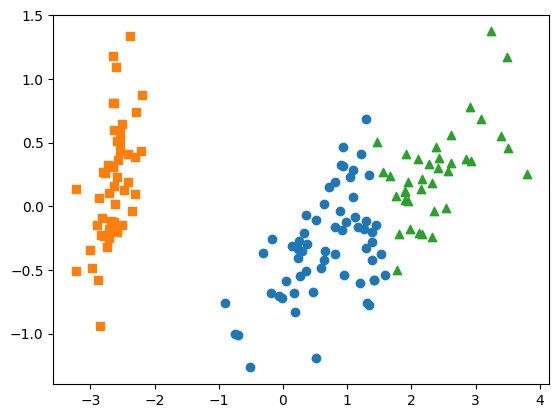

In [ ]:
plt.scatter(x=irisDF.loc[marker0_idx, 'pca_x'], y=irisDF.loc[marker0_idx, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_idx, 'pca_x'], y=irisDF.loc[marker1_idx, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_idx, 'pca_x'], y=irisDF.loc[marker2_idx, 'pca_y'], marker='^')

In [ ]:
marker0_idx = irisDF[irisDF.pca_clus==0].index
marker1_idx = irisDF[irisDF.pca_clus==1].index
marker2_idx = irisDF[irisDF.pca_clus==2].index

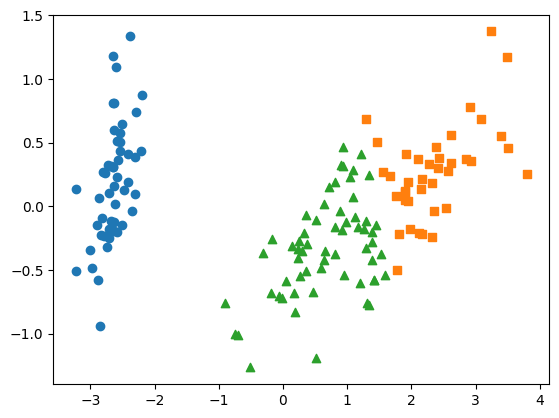

In [ ]:
plt.scatter(x=irisDF.loc[marker0_idx, 'pca_x'], y=irisDF.loc[marker0_idx, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_idx, 'pca_x'], y=irisDF.loc[marker1_idx, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_idx, 'pca_x'], y=irisDF.loc[marker2_idx, 'pca_y'], marker='^')

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

In [ ]:
X.shape, y.shape

((200, 2), (200,))

In [ ]:
y

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1])

In [ ]:
unique, counts = np.unique(y, return_counts=True)

In [ ]:
unique

array([0, 1, 2])

In [ ]:
counts

array([67, 67, 66])

In [ ]:
clusterDF = pd.DataFrame(data=X, columns=['ft1', 'ft2'])
clusterDF['target']=y
clusterDF

,ft1,ft2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
...,...,...,...
195,2.956576,0.033718,1
196,-2.074113,4.245523,2
197,2.783411,1.151438,1
198,1.226724,3.620511,0


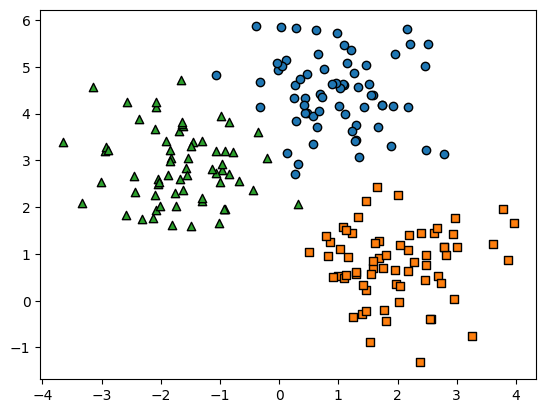

In [ ]:
markers = ['o', 's', '^']

for un in unique:
    target_cluster = clusterDF[clusterDF.target==un]
    plt.scatter(x=target_cluster.ft1, y=target_cluster.ft2, marker=markers[un], edgecolors='k')

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)

In [ ]:
cluster_labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_labels

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2], dtype=int32)

In [ ]:
clusterDF['kmeans_label'] = cluster_labels

In [ ]:
clusterDF

,ft1,ft2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,2
196,-2.074113,4.245523,2,1
197,2.783411,1.151438,1,2
198,1.226724,3.620511,0,0


In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
centers

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [ ]:
unique

array([0, 1, 2])

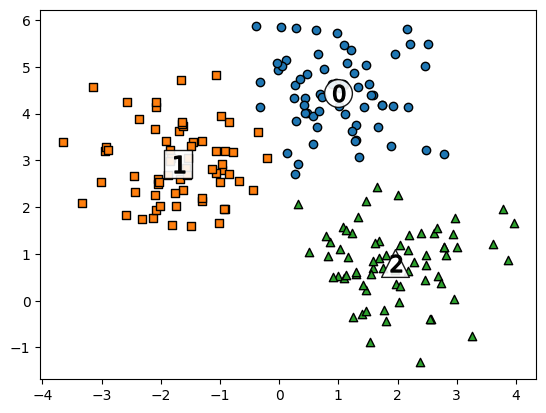

In [ ]:
for un in unique:
    target_cluster = clusterDF[clusterDF.kmeans_label == un]
    center_x_y = centers[un]
    plt.scatter(x=target_cluster.ft1, y=target_cluster.ft2, marker=markers[un], edgecolors='k')
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=400, color='white', alpha=0.9,
                marker=markers[un], edgecolors='k')
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=150, color='k',
                marker='$%d$'%un, edgecolors='k')

silhouette 분석

: 군집간의 거리는 멀고 같은 군집에서는 서로 가까이 모여 있는 정도로 판단한다.

$$S(i) = {b(i) - a(i) \over max(a(i), b(i))}$$

a(i) = 같은 군집내에서 임의의 데이터 한개와 다른 데이터들과의 거리를 평균낸 값

b(i) = a(i) 계산에 사용한 임의의 데이터와 다른 군집에 있는 모든 데이터들과의 거리를 평균낸 값

S(i)

        - -1 ~ 1 사이의 값

        - 1 : 군집화 잘된것

        - 0 : 다른 군집이 가까이 있다

        - -1 : 다른 군집이 포함되어 있다.


- sklearn.metrics.sihouette_samples : 각 포인터의 실루엣 계수를 반환해 준다.

- sklearn.metrics.sihouette_score : 전체 데이터의 실루엣 계수를 평균내어 반환한다.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y,pca_clus
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755,0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532,1
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317,2
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859,1
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628,1


In [ ]:
X_features = irisDF.iloc[:, :4]

In [ ]:
X_features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
kmeans.fit(X_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=200, n_clusters=3, random_state=0)

In [ ]:
X_features['cluster']=kmeans.labels_

In [ ]:
X_features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
score_samples = silhouette_samples(iris.data, X_features.cluster)

In [ ]:
score_samples

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835,
       0.02672203, 0.38118643, 0.05340075, 0.59294381, 0.36885321,
       0.59221025, 0.28232583, 0.26525405, 0.34419223, 0.57829491,
       0.37478707, 0.58710354, 0.55107857, 0.48216686, 0.56310057,
       0.32459291, 0.55751057, 0.61072967, 0.46149897, 0.6115753 ,
       0.32909528, 0.58968904, 0.31046301, 0.49424779, 0.50004

In [ ]:
score_samples.shape

(150,)

In [ ]:
X_features['silhouette_samples'] = score_samples

In [ ]:
average_score = silhouette_score(iris.data, X_features.cluster)

In [ ]:
average_score

0.5528190123564095

In [ ]:
X_features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,silhouette_samples
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.425136
146,6.3,2.5,5.0,1.9,0,0.104171
147,6.5,3.0,5.2,2.0,2,0.314930
148,6.2,3.4,5.4,2.3,2,0.352454


In [ ]:
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


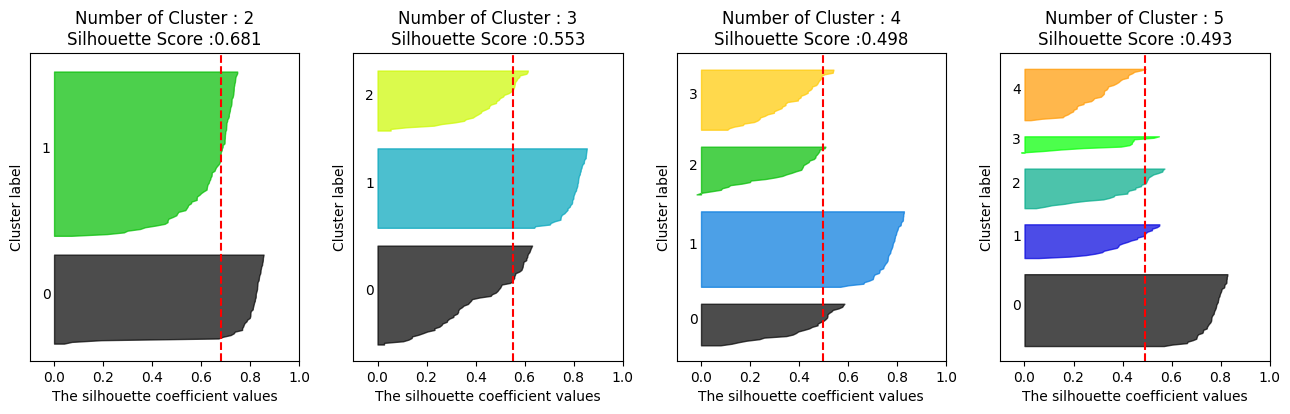

In [ ]:
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

#DBSCAN (Density Based Spatial Clustering of Applications with Noise, 밀도기반클러스터링)

sklearn.cluster.DBSCAN


    eps : 반경

    min_samples : 원안에 들어올 데이터의 최소수, 예제=4

    metric : 'euclidean'

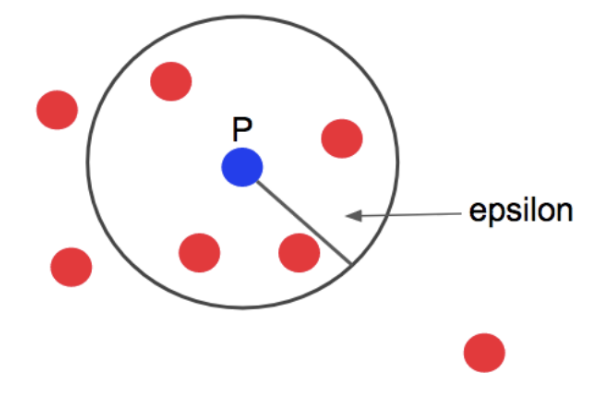

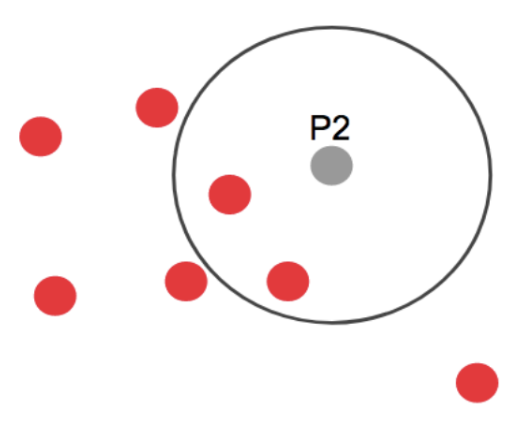

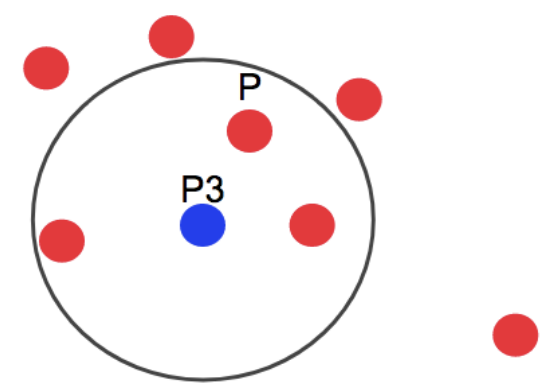

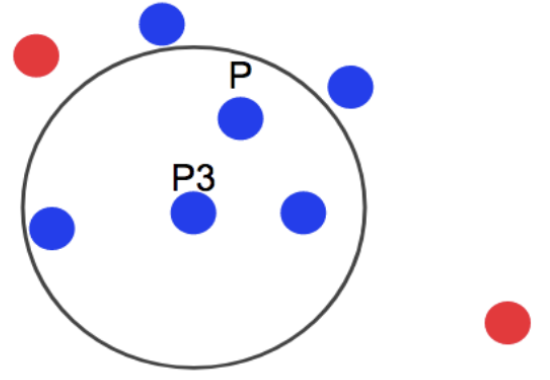

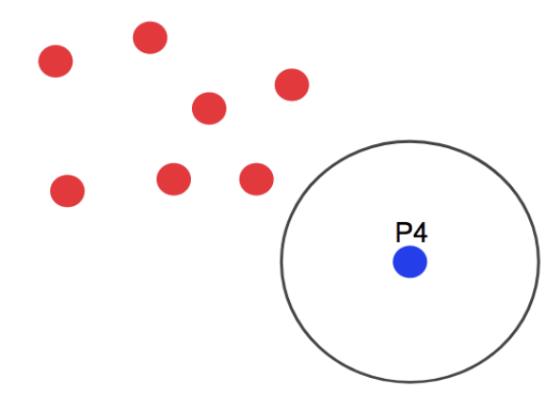

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
iris = load_iris()

In [ ]:
irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
irisDF['target'] = iris.target

In [ ]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')

In [ ]:
dbscan_labels = dbscan.fit_predict(iris.data)

In [ ]:
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
irisDF['dbscan_cluster']=dbscan_labels

In [ ]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,dbscan_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [ ]:
irisDF.groupby(['target'])['dbscan_cluster'].value_counts()

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

In [ ]:
irisDF['dbscan_cluster'] = dbscan_labels

In [ ]:
irisDF.groupby(['target'])['dbscan_cluster'].value_counts()

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF.groupby(['target'])['dbscan_cluster'].value_counts()

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64

#가상 데이터 사용하기

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, factor=0.5, random_state=0)

In [ ]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

In [ ]:
clusterDF

,ftr1,ftr2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,0
3,0.316549,0.312730,1
4,-0.304804,0.407563,1
...,...,...,...
995,-0.222906,-0.326809,1
996,-0.766648,0.677558,0
997,-0.012036,0.396755,1
998,0.398129,0.318982,1


In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

In [ ]:
clusterDF

,ftr1,ftr2,target,dbscan_cluster
0,0.519781,-0.015981,1,0
1,-0.057719,-0.420279,1,0
2,-0.805155,-0.662227,0,1
3,0.316549,0.312730,1,0
4,-0.304804,0.407563,1,0
...,...,...,...,...
995,-0.222906,-0.326809,1,0
996,-0.766648,0.677558,0,1
997,-0.012036,0.396755,1,0
998,0.398129,0.318982,1,0


In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

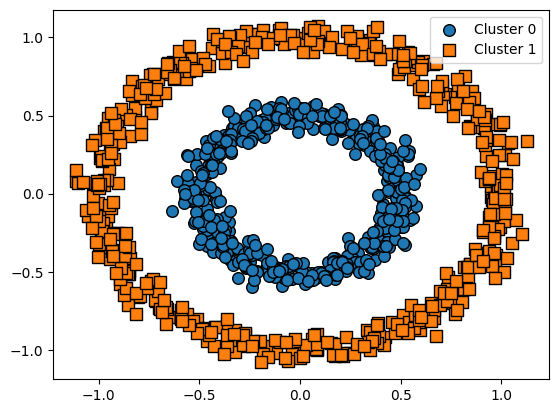

In [ ]:
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

In [ ]:
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusterDF

,ftr1,ftr2,target,dbscan_cluster,kmeans_cluster
0,0.519781,-0.015981,1,0,0
1,-0.057719,-0.420279,1,0,0
2,-0.805155,-0.662227,0,1,0
3,0.316549,0.312730,1,0,1
4,-0.304804,0.407563,1,0,1
...,...,...,...,...,...
995,-0.222906,-0.326809,1,0,0
996,-0.766648,0.677558,0,1,1
997,-0.012036,0.396755,1,0,1
998,0.398129,0.318982,1,0,1


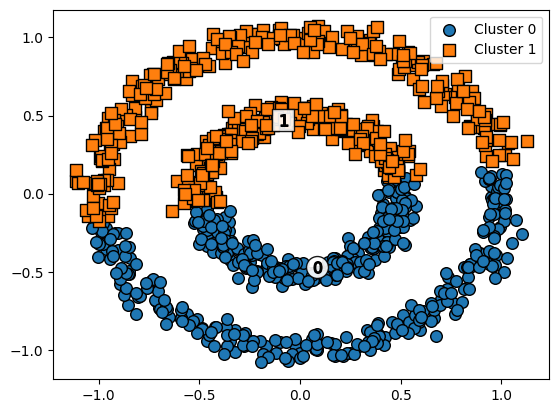

In [ ]:
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

#예제 : 고객 분류

In [ ]:
ls ./drive/MyDrive/data/Onl*

./drive/MyDrive/data/Online_Retail.xlsx


In [ ]:
retail_df = pd.read_excel('./drive/MyDrive/data/Online_Retail.xlsx')

In [ ]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Recency : 최근구매일, 숫자로 표현, 마지막 구매일로부터 오늘까지의 날짜수

Frequency : 상품구매 횟수

Monetary : 총 구매 금액

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
retail_df = retail_df[retail_df.Quantity>0]

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [ ]:
retail_df = retail_df[retail_df.UnitPrice>0]

In [ ]:
retail_df = retail_df[retail_df.CustomerID.notnull()]

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [ ]:
retail_df.Country.value_counts()

United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [ ]:
retail_df = retail_df[retail_df.Country=='United Kingdom']

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  float64       
 7   Country      354321 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [ ]:
retail_df['sale_amount'] = retail_df.Quantity * retail_df.UnitPrice

In [ ]:
retail_df.sale_amount

0          15.30
1          20.34
2          22.00
3          20.34
4          20.34
           ...  
541889     23.40
541890     23.60
541891     30.00
541892    214.80
541893     70.80
Name: sale_amount, Length: 354321, dtype: float64

In [ ]:
retail_df['CustomerID'] = retail_df.CustomerID.astype(int)

In [ ]:
retail_df.CustomerID

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541889    15804
541890    13113
541891    13113
541892    13113
541893    13113
Name: CustomerID, Length: 354321, dtype: int64

CustomerID 별로, sale_amount 합계를 산출해 주세요.

sort_values : 내림차순 정렬

In [ ]:
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False))

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: sale_amount, Length: 3920, dtype: float64


In [ ]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count()

InvoiceNo  StockCode
536365     21730        1
           22752        1
           71053        1
           84029E       1
           84029G       1
                       ..
581585     84946        1
581586     20685        1
           21217        1
           22061        1
           23275        1
Name: InvoiceNo, Length: 344435, dtype: int64

In [ ]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count()[retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count()>5]

InvoiceNo  StockCode
538514     21756         6
540524     21756         6
541266     21754         6
           21755         6
555524     22697        12
           22698        20
572344     M             7
572861     22775         8
574481     23084         6
578289     23395         7
Name: InvoiceNo, dtype: int64

In [ ]:
one = retail_df[retail_df.InvoiceNo==538514]

In [ ]:
one.StockCode.value_counts()

21756      6
21755      4
22086      3
48194      2
48116      1
48173C     1
21500      1
22175      1
22176      1
22505      1
21623      1
15056N     1
20679      1
15056BL    1
21499      1
15056P     1
21754      1
48188      1
48111      1
21524      1
20685      1
48184      1
48138      1
22689      1
22171      1
22688      1
21175      1
21733      1
22804      1
85123A     1
21794      1
22834      1
21677      1
21676      1
21675      1
21680      1
21481      1
22112      1
22835      1
22809      1
85066      1
22810      1
84029E     1
84030E     1
84029G     1
21181      1
21498      1
Name: StockCode, dtype: int64

Frequency : InvoiceNo -> count()

Monetary : sale_amount -> sum()

Recency : InvoceDate -> max()

In [ ]:
df = pd.DataFrame([[1, 4, 7], [2, 5, 8], [3, 6, 9]])

In [ ]:
df

,0,1,2
0,1,4,7
1,2,5,8
2,3,6,9


In [ ]:
df.agg(['min', 'max', 'sum', 'count'])

,0,1,2
min,1,4,7
max,3,6,9
sum,6,15,24
count,3,3,3


In [ ]:
df.agg({2:'sum', 0:'max', 1:'min'})

2    24
0     3
1     4
dtype: int64

In [ ]:
aggregations = {'InvoiceDate':'max',
                'InvoiceNo': 'count',
                'sale_amount':'sum'}

In [ ]:
cust_df = retail_df.groupby('CustomerID').agg(aggregations)

In [ ]:
cust_df.head()

,InvoiceDate,InvoiceNo,sale_amount
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4595,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34


In [ ]:
cust_df = cust_df.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency',
                                  'sale_amount':'Monetary'})

In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Recency    3920 non-null   datetime64[ns]
 1   Frequency  3920 non-null   int64         
 2   Monetary   3920 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 122.5 KB


In [ ]:
cust_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4595,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34


In [ ]:
cust_df.Recency.max()

Timestamp('2011-12-09 12:49:00')

2011-12-10 일을 기준으로 생각하자

In [ ]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011, 12, 11) - cust_df['Recency']

In [ ]:
cust_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326 days 13:59:00,1,77183.60
12747,3 days 09:26:00,103,4196.01
12748,1 days 11:40:00,4595,33719.73
12749,4 days 14:04:00,199,4090.88
12820,4 days 08:48:00,59,942.34


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Recency    3920 non-null   timedelta64[ns]
 1   Frequency  3920 non-null   int64          
 2   Monetary   3920 non-null   float64        
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 122.5 KB


In [ ]:
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days)

AttributeError: ignored

In [ ]:
cust_df

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12747,3,103,4196.01
12748,1,4595,33719.73
12749,4,199,4090.88
12820,4,59,942.34
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,12,178.05


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    3920 non-null   int64  
 1   Frequency  3920 non-null   int64  
 2   Monetary   3920 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 122.5 KB


(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

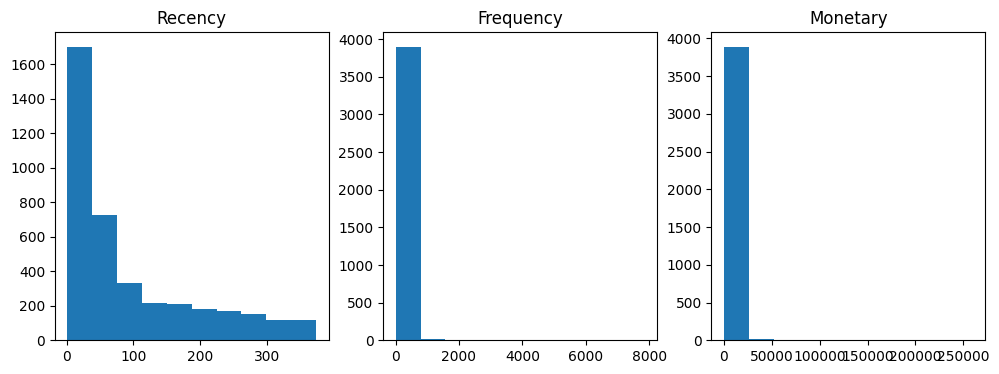

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary')
ax3.hist(cust_df['Monetary'])

In [ ]:
cust_df.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values

In [ ]:
X_features_scaled = StandardScaler().fit_transform(X_features)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
silhouette_score(X_features_scaled, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5923691942714455

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


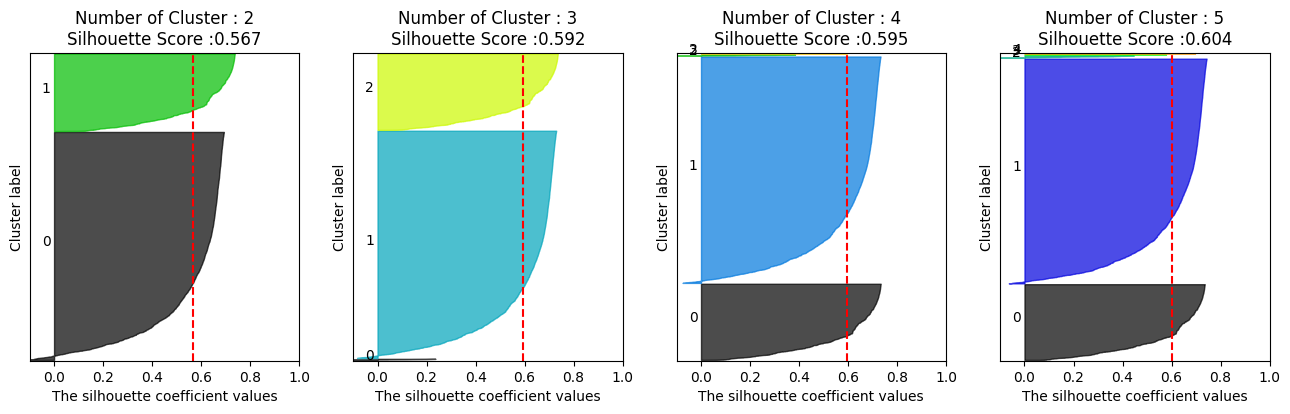

In [ ]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)

In [ ]:
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

In [ ]:
cust_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346,326,1,77183.60,5.789960,0.693147,11.253955
12747,3,103,4196.01,1.386294,4.644391,8.342128
12748,1,4595,33719.73,0.693147,8.432942,10.425868
12749,4,199,4090.88,1.609438,5.298317,8.316760
12820,4,59,942.34,1.609438,4.094345,6.849427


In [ ]:
X_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


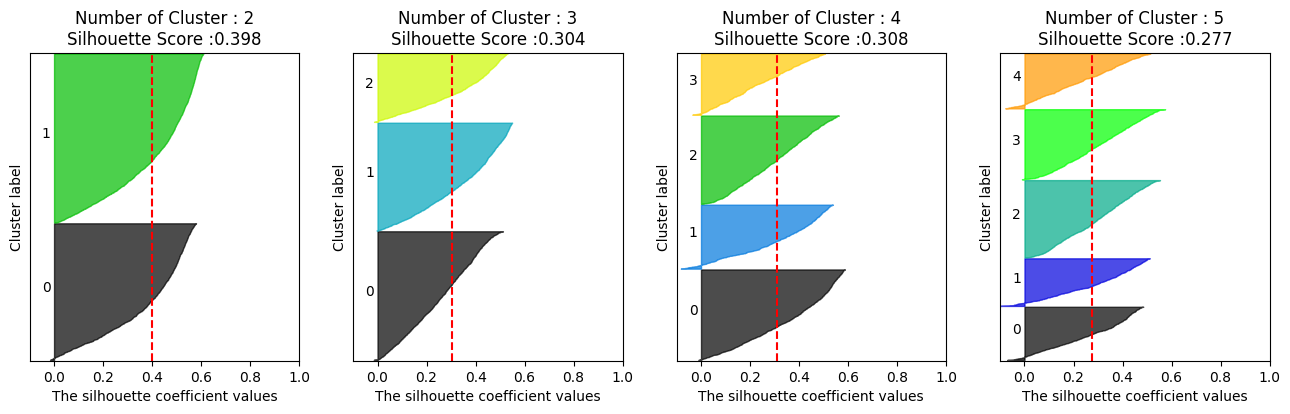

In [ ]:
visualize_silhouette([2, 3, 4, 5], X_features)

#텍스트 분석

텍스트 분석 절차

    1. 텍스트 정규화

        - 클렌징

        - 토큰화 ( 단어, 문장)

        - 필터링/스톱워드제거

        - Stemming/ Lemmatization (단어의 원형 찾기)


    2. 피처 벡턱화/추출

        - BOW (Bag of Words)

            CountVertorizer : 문서에서 단어가 나타난 빈도수

            TfidfVectorizer : 개별 문서에서 자주 출현하는 단어에 높은 가중치, 그러나 모든 문서에 자주 나타나면 가중치를 감소 시킴

        - Word2Vec

    3. ML 모델 수립/학습/평가